In [8]:
import networkx as nx
from networkx.algorithms import isomorphism

from DataBenchmarks.data import print_data, TestCases as T, sample_exists, sample_not_exists
#from DataBenchmarks.flowerGraph import *
from AlgorithmsLibraries.alglib_version_02_current import *
#from AlgorithmsLibraries.debug_helpers import *

import sys
from contextlib import contextmanager


@contextmanager
def suppress_output():
    original_stdout = sys.stdout
    sys.stdout = None
    try:
        yield
    finally:
        sys.stdout = original_stdout

In [9]:
T.sample.defining_pair

DefiningPair(C=('01242154312310', '02352510', '02130214210', '01320213025310', '01323510', '02141345320', '015452034531210', '0214130251320', '01352101421320'), L=('0235431302105', '012410120314'))

In [10]:
sample_exists

(('14520542321241',
  '14501',
  '16521263301',
  '143513361',
  '126356341',
  '1635130541',
  '16536242102541',
  '16253621',
  '16345201',
  '143315362561',
  '10315361'),
 ('1653624',
  '1436124',
  '1436521',
  '12635621',
  '163423',
  '105423',
  '10334210',
  '1054210'))

In [4]:
sample_not_exists

(('14520542321241',
  '14501',
  '16521263301',
  '143513361',
  '126356341',
  '1635130541',
  '16536242102541',
  '16253621',
  '16345201',
  '143315362561',
  '10315361',
  '191'),
 ('1653624',
  '1436124',
  '1436521',
  '12635621',
  '163423',
  '105423',
  '10334210',
  '1054210'))

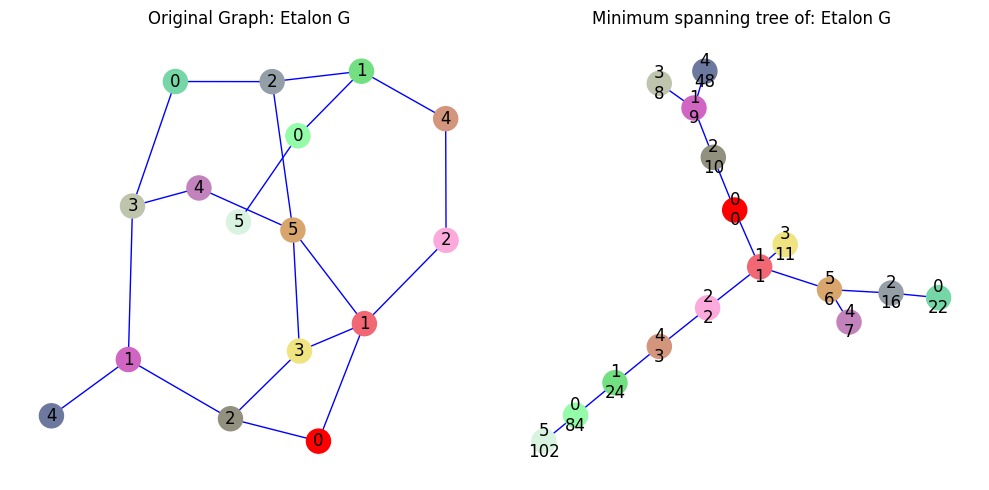

In [5]:
G = ap_graph(T.sample.defining_pair.C, T.sample.defining_pair.L, T.sample.root_label)
G.name = 'Etalon G'
print_data(G)

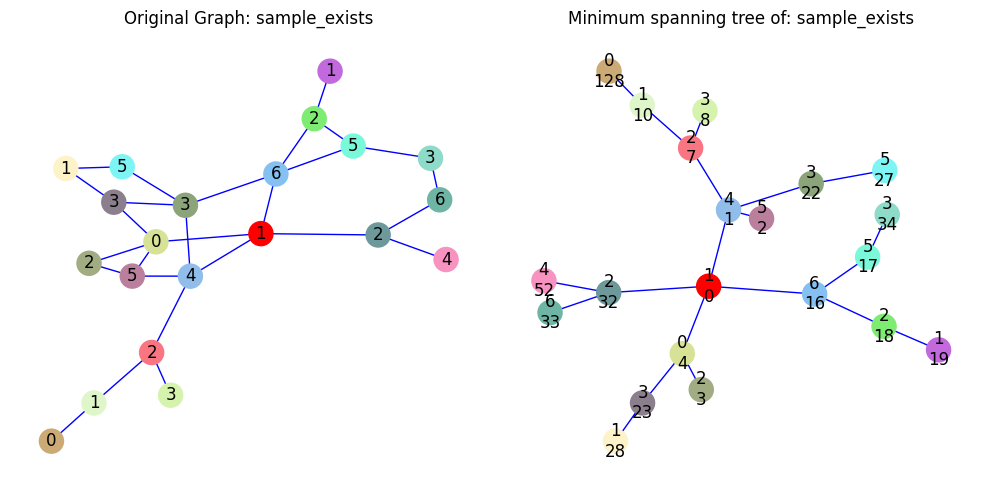

In [6]:
S = ap_graph(sample_exists[0], sample_exists[1])
S.name = 'sample_exists'
print_data(S)

In [7]:
ap_graph(sample_not_exists[0], sample_not_exists[1])

ValueError: Incorrect data. Graph is not exists!
Vertex id/label: {87: '9'} is not in the scope of L.

In [11]:
c_pair_of_G_by_ac_pair = ac_pair(G)
c_pair_of_G_by_compression = compression(T.sample.defining_pair.C, T.sample.defining_pair.L)
c_pair_of_G_by_compression

UNCOMPRESSED DEFINING PAIR: 
 ('01242154312310', '02352510', '02130214210', '01320213025310', '01323510', '02141345320', '015452034531210', '0214130251320', '01352101421320') ('0235431302105', '012410120314')
101  Operation 3 is performed. word=01323510, modified=013510, 

 global_deleted_paths={'0132'} 

102  Operation 3 is performed. word=02352510, modified=023510, 

 global_deleted_paths={'0132', '0152'} 

103  Operation 3 is performed. word=02141345320, modified=021345320, 

 global_deleted_paths={'0132', '0152', '0214'} 

104  Operation 3 is performed. word=0214130251320, modified=02130251320, 

 global_deleted_paths={'0132', '0152', '0214'} 

105  Operation 3 is performed. word=01242154312310, modified=012154312310, 

 global_deleted_paths={'0132', '0152', '0214', '0124'} 

106  Operation 3 is performed. word=012154312310, modified=0154312310, 

 global_deleted_paths={'0124', '012', '0214', '0132', '0152'} 

107  Operation 3 is performed. word=01320213025310, modified=01321302531

{'compressed_pair': (('01320', '013510', '01543120', '012412510', '015203120'),
  ('0214', '0124105')),
 'graph_exists': True}

In [12]:
c_pair_of_G_by_ac_pair

(('01320', '013510', '012412510', '01543120', '015203120'),
 ('0214', '0124105'))

In [13]:
c_pair_of_G_by_compression = c_pair_of_G_by_compression['compressed_pair']
c_pair_of_G_by_compression

(('01320', '013510', '01543120', '012412510', '015203120'),
 ('0214', '0124105'))

In [14]:
def tuple_to_set(t):
    return {frozenset(subtuple) for subtuple in t}

set1 = tuple_to_set(c_pair_of_G_by_ac_pair)
set2 = tuple_to_set(c_pair_of_G_by_compression)

if set1 == set2:
    print("Pair is equal: ", set1 == set2)

Pair is equal:  True


In [15]:
with suppress_output():
    sample_compressed = compression(sample_exists[0], sample_exists[1])

ac_pair(S) == sample_compressed['compressed_pair']

True

In [16]:
G1 = ap_graph(c_pair_of_G_by_ac_pair[0], c_pair_of_G_by_ac_pair[1], '0')
G2 = ap_graph(c_pair_of_G_by_compression[0], c_pair_of_G_by_compression[1], '0')

GM = isomorphism.GraphMatcher(G, G1)
GM1 = isomorphism.GraphMatcher(G, G2)
GM2 = isomorphism.GraphMatcher(G1, G2)
if GM.is_isomorphic() and GM1.is_isomorphic() and GM2.is_isomorphic():
    print("Graphs is isomorfic")

Graphs is isomorfic


In [17]:
S1 = ap_graph(sample_compressed['compressed_pair'][0], sample_compressed['compressed_pair'][1], '1')
SM = isomorphism.GraphMatcher(S, S1)
SM.is_isomorphic()

True